# Importanto bibliotecas e dados

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [2]:
#Bilbiotecas para realizar operações sobre os dados
import pandas as pd
import numpy as np
import seaborn as sns

#Bibliotecas para visualização de dados, gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Importanto técnicas de avaliação de modelos 
from sklearn.metrics import accuracy_score  #métrica acurácia
from sklearn.metrics import precision_score #métrica precisão
from sklearn.metrics import classification_report #várias métricas
from sklearn.model_selection import train_test_split #técnica de partição em treino e teste

#Importando as técnicas de aprendizagem 
from sklearn.naive_bayes import GaussianNB #técnica de análise bayesiana
from sklearn.ensemble import RandomForestClassifier #técnica random forest
from sklearn.linear_model import LogisticRegression #técninca de regressão logística
from sklearn.svm import SVC #técnica SVM


#Importando técnica de padronização para o conjunto de dados
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Importando os arquivos
amostra = pd.read_csv("/kaggle/input/playground-series-s3e12/sample_submission.csv")
treino = pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")
teste = pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")


# Visualizando os dados

In [4]:
print(treino.head())


   id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1


In [5]:
treino.shape

(414, 8)

In [6]:
treino.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [7]:
print(teste.head())


    id  gravity    ph  osmo  cond  urea   calc
0  414    1.017  5.24   345  11.5   152   1.16
1  415    1.020  5.68   874  29.0   385   3.46
2  416    1.024  5.36   698  19.5   354  13.00
3  417    1.020  5.33   668  25.3   252   3.46
4  418    1.011  5.87   567  29.0   457   2.36


In [8]:
teste.shape

(276, 7)

In [9]:
teste.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

0    230
1    184
Name: target, dtype: int64


Text(0, 0.5, 'Contagem')

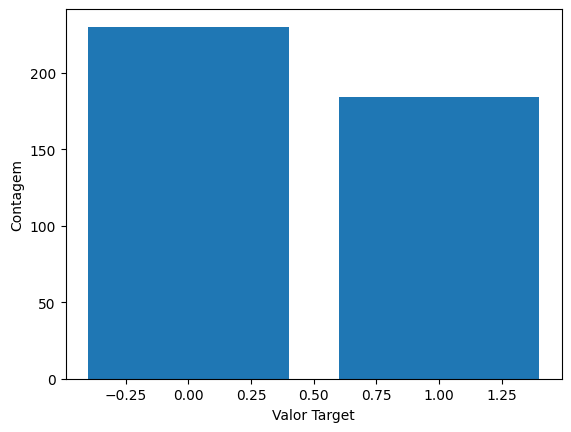

In [10]:
counts = (treino['target'].value_counts())
print(counts)

plt.bar(counts.index, counts.values)
plt.xlabel("Valor Target")
plt.ylabel("Contagem")



<AxesSubplot: xlabel='gravity', ylabel='Count'>

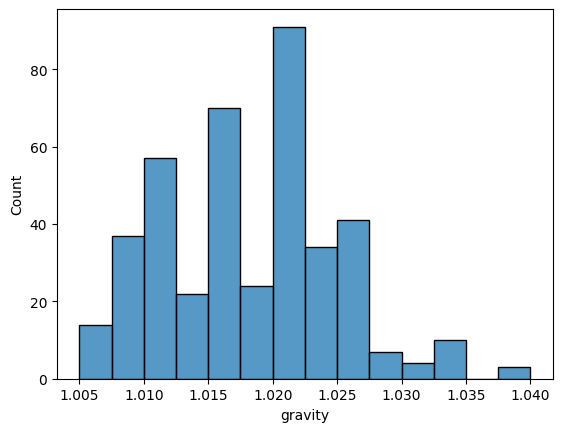

In [11]:
sns.histplot(treino['gravity'])


<AxesSubplot: xlabel='ph', ylabel='Count'>

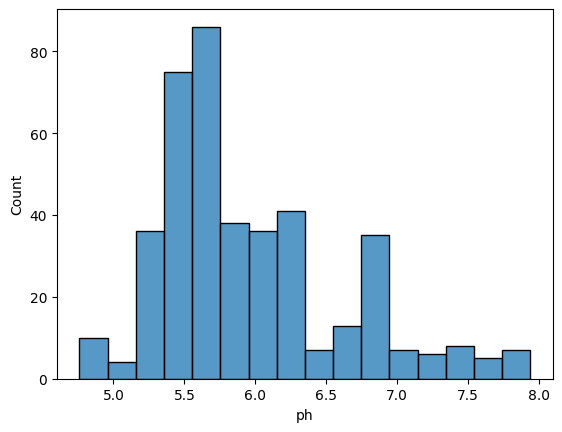

In [12]:
sns.histplot(treino['ph'])

<AxesSubplot: xlabel='osmo', ylabel='Count'>

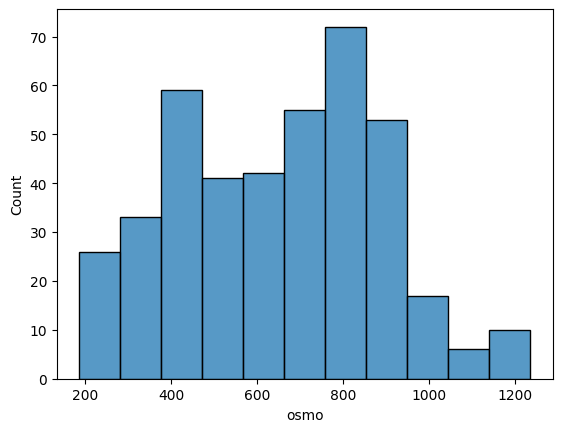

In [13]:
sns.histplot(treino['osmo'])

<AxesSubplot: xlabel='cond', ylabel='Count'>

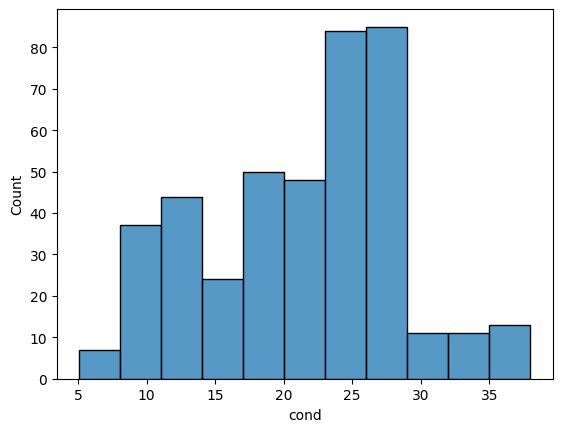

In [14]:
sns.histplot(treino['cond'])

<AxesSubplot: xlabel='urea', ylabel='Count'>

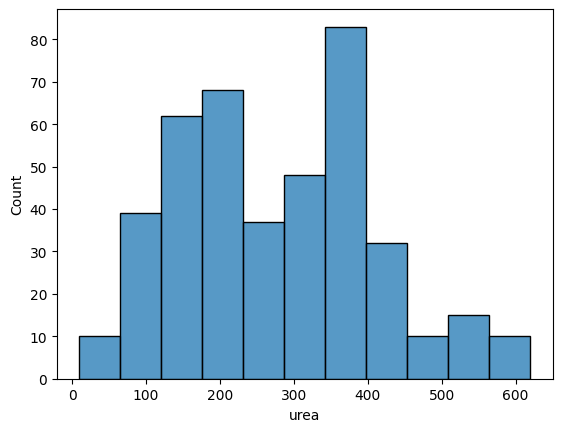

In [15]:
sns.histplot(treino['urea'])

<AxesSubplot: xlabel='calc', ylabel='Count'>

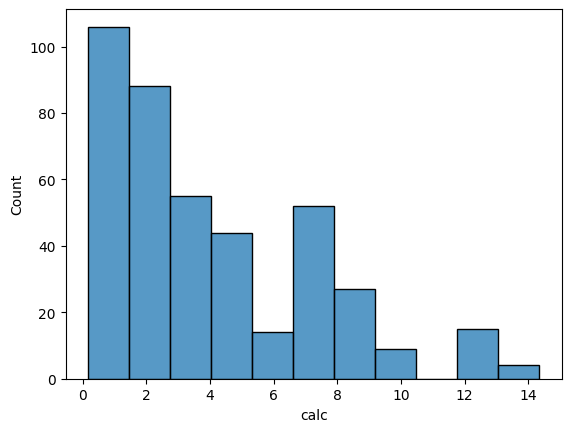

In [16]:
sns.histplot(treino['calc'])

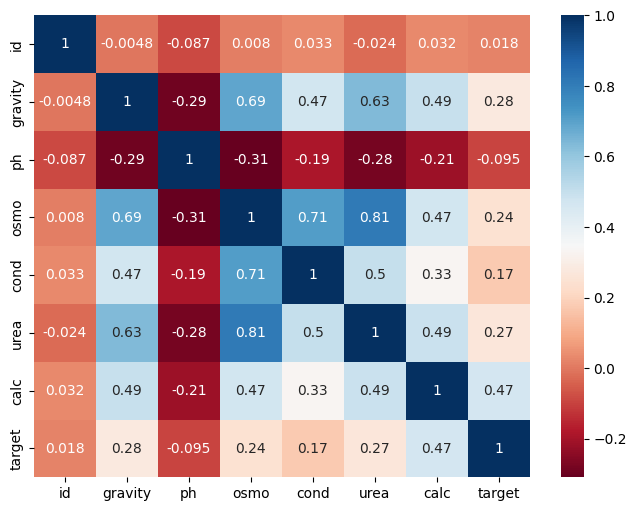

In [17]:
correlacao = treino.corr()
correlacao
plt.rc('figure', figsize = (8,6))
ax = sns.heatmap(correlacao, cmap ='RdBu', annot = True)

# Pré-processamento

In [18]:
X = treino.drop(['target', 'id'], axis =1)
y = treino.target

atributos_teste = teste.drop(['id'], axis=1)

In [19]:
X = X.values

In [20]:
y = y.values

In [21]:
atributos_teste = atributos_teste.values

In [22]:
scaler = StandardScaler()
scaler.fit(X)

abtributos = scaler.transform(X)
atributos_teste = scaler.transform(atributos_teste)

In [23]:
X_treino, X_teste, y_treino, y_teste =   train_test_split(X, y, random_state = 42)

In [24]:
print("dados de treino", X_treino.shape, y_treino.shape)
print("dados de teste", X_teste.shape, y_teste.shape)

dados de treino (310, 6) (310,)
dados de teste (104, 6) (104,)


# Treinando modelos

****Análise Bayesiana****

In [71]:
modelo_1 = GaussianNB()

In [72]:
modelo_1.fit(X_treino, y_treino.ravel())

GaussianNB()

In [73]:
nb_predict_train = modelo_1.predict(X_treino)

In [74]:
ac_nb_train = metrics.accuracy_score(y_treino, nb_predict_train)

In [75]:
print("Acurácia:", ac_nb_train)

Acurácia: 0.6580645161290323


In [76]:
nb_predict_test = modelo_1.predict(X_teste)

In [77]:
ac_nb_test = metrics.accuracy_score(y_teste, nb_predict_test)

In [78]:
print("Acurácia: ", ac_nb_test)

Acurácia:  0.7596153846153846


In [79]:
print("Classificador Report")
print(metrics.classification_report(y_teste, nb_predict_test))

Classificador Report
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        53
           1       0.74      0.78      0.76        51

    accuracy                           0.76       104
   macro avg       0.76      0.76      0.76       104
weighted avg       0.76      0.76      0.76       104



**Random Forest**

In [80]:
modelo_2 = RandomForestClassifier(random_state = 123)
modelo_2.fit(X_treino, y_treino)

RandomForestClassifier(random_state=123)

In [81]:
modelo_2 = RandomForestClassifier(random_state = 123)
modelo_2.fit(X_treino, y_treino.ravel())

RandomForestClassifier(random_state=123)

In [82]:
rf_predict_train = modelo_2.predict(X_treino)
ac_rf_train = metrics.accuracy_score(y_treino, rf_predict_train)
print("Acurácia: ", ac_rf_train)

Acurácia:  1.0


In [83]:
rf_predict_test = modelo_2.predict(X_teste)
ac_rf_test = metrics.accuracy_score(y_teste, rf_predict_test)
print("Acurácia: ", ac_rf_test)

Acurácia:  0.7211538461538461


In [84]:
print("Classification Report")
print(metrics.classification_report\
      (y_teste, rf_predict_test, labels = [1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.67      0.70        51
           0       0.71      0.77      0.74        53

    accuracy                           0.72       104
   macro avg       0.72      0.72      0.72       104
weighted avg       0.72      0.72      0.72       104



**Regressão logística**

In [66]:
modelo_3 = LogisticRegression(random_state = 5, max_iter = 1000)
modelo_3.fit(X_treino, y_treino.ravel())

LogisticRegression(max_iter=1000, random_state=5)

In [67]:
lr_predict_train = modelo_3.predict(X_treino)
ac_lr_train = metrics.accuracy_score(y_treino, lr_predict_train)
print("Acurácia: ", ac_lr_train)

Acurácia:  0.7225806451612903


In [68]:
lr_predict_test = modelo_3.predict(X_teste)

In [69]:
ac_lr_test = metrics.accuracy_score(y_teste, lr_predict_test)
print("Acurácia: ", ac_lr_test)

print("Classification Report")
print(metrics.classification_report(y_teste, lr_predict_test))

Acurácia:  0.7692307692307693
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        53
           1       0.81      0.69      0.74        51

    accuracy                           0.77       104
   macro avg       0.78      0.77      0.77       104
weighted avg       0.78      0.77      0.77       104



**SVM**

In [85]:
from sklearn.svm import SVC

In [95]:
modelo_4 = SVC(random_state=5)

In [96]:
modelo_4.fit(X_treino, y_treino.ravel())

SVC(random_state=5)

In [97]:
svc_predict_train = modelo_4.predict(X_treino)
ac_svc_train = metrics.accuracy_score(y_treino, svc_predict_train)
print("Acurácia: ", ac_svc_train)

Acurácia:  0.6161290322580645


In [98]:
svc_predict_test = modelo_4.predict(X_teste)

In [99]:
ac_svc_test = metrics.accuracy_score(y_teste, svc_predict_test)
print("Acurácia: ", ac_svc_test)

print("Classification Report")
print(metrics.classification_report(y_teste, svc_predict_test))

Acurácia:  0.625
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        53
           1       0.62      0.59      0.61        51

    accuracy                           0.62       104
   macro avg       0.62      0.62      0.62       104
weighted avg       0.62      0.62      0.62       104



**Conclusão**

Regressão logística mostrou o melhor resultado

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=GaussianNB()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

# Teste

In [101]:
test_predictions = modelo_1.predict_proba(atributos_teste)[:,1]
submit = pd.read_csv('/kaggle/input/playground-series-s3e12/sample_submission.csv')
submit.target = test_predictions
submit.to_csv('submission7.csv', index=False)